**VIDEO GAME RECOMMENDER SYSTEM WITH NEURAL NETWORKS**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
game_reviews = pd.read_csv('ratings.csv', sep=',')

In [3]:
print (game_reviews.shape)

(29826315, 3)


The dataset comprises **29.826.314** video game ownerships.

In [4]:
game_reviews.head()

,id,rate,appid
0,76561197960265729,1.0,10
1,76561197960265729,1.0,20
2,76561197960265729,1.0,30
3,76561197960265729,1.0,40
4,76561197960265729,1.0,50


In [5]:
game_reviews["rate"].describe()

count    2.982632e+07
mean     1.307054e+00
std      8.556772e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.100000e+00
max      5.950000e+00
Name: rate, dtype: float64

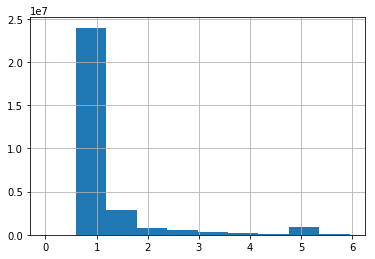

In [6]:
game_reviews["rate"].hist(bins=10)

The median of the dataset is 1.

In [13]:
users = game_reviews.id.unique()
print (len(users))
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
games = game_reviews.appid.unique()
game_map = {i:val for i,val in enumerate(games)}
inverse_game_map = {val:i for i,val in enumerate(games)}

game_reviews["id"] = game_reviews["id"].map(inverse_user_map)
game_reviews["old_id"] = game_reviews["appid"] # copying for join with metadata
game_reviews["appid"] = game_reviews["appid"].map(inverse_game_map)

print ("We have % users", users.shape[0])
print ("We have % games", games.shape[0])

642335
We have % users 642335
We have % games 18834


From the dataset, there are around 642335 distinct users and 18834 games.

In [8]:
users_nb = game_reviews['id'].value_counts().reset_index()
users_nb.columns= ['id','nb_lines']
users_nb['nb_lines'].describe()

count    642335.000000
mean         46.434205
std         144.256427
min           1.000000
25%           5.000000
50%          13.000000
75%          30.000000
max       14874.000000
Name: nb_lines, dtype: float64

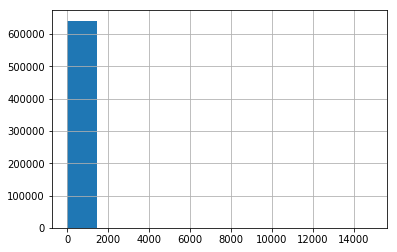

In [9]:
import seaborn
users_nb['nb_lines'].hist()

50% of the users in our dataset owns no more than 13 video games, whereas the maximum amount of games a user currently has is 14874.

In [14]:
games_nb = game_reviews['old_id'].value_counts().reset_index()
games_nb.columns= ['old_id','nb_lines']
games_nb['nb_lines'].describe()

count     18834.000000
mean       1583.642083
std        9855.725739
min           1.000000
25%          15.000000
50%          99.000000
75%         606.000000
max      409211.000000
Name: nb_lines, dtype: float64

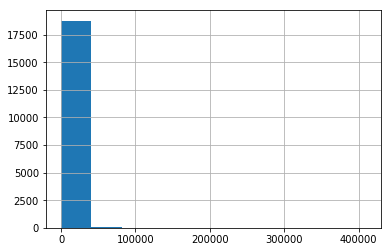

In [15]:
games_nb['nb_lines'].hist()

50% of the games have 99 ownerships or less, while 75% of the games have at most 606 ownerships.

In [10]:
a = game_reviews.dropna()[['id','rate','appid']]

In [20]:
game_reviews['appid'].value_counts()

15       409211
14       406527
11       404073
10       377406
0        309368
2        270734
3        269448
5        269230
6        266464
4        261382
9        261140
1        260618
23       193909
16       161544
18       155554
13       154300
17       148444
21       145215
19       126389
338      117334
8        111421
7        111421
22       107782
239       99088
759       92063
40        82780
20        81312
259       79972
416       79514
230       72877
          ...  
16815         1
17582         1
17568         1
15738         1
16818         1
17570         1
16830         1
5745          1
16828         1
16826         1
16121         1
17599         1
16803         1
5771          1
17586         1
17619         1
17589         1
16812         1
17609         1
16809         1
16789         1
17603         1
17605         1
17606         1
16797         1
5854          1
15721         1
17631         1
17616         1
14903         1
Name: appid, Length: 188